# SAIPS Home Excercise - Defects Detection
## Nadav Carmel

In this notebook I'll review the approaches taken for solving the detection problem, results, conclusions and further ideas.
(sorry for the notebook - had some issue attaching the figs in overleaf latex)

We have 3 pairs (inspected, reference) of images, two pairs containing some defects and one pair does not.
Each pair contains images which are highly similar, except of:
- small relative translation
- the defects that exist in one but (assumed) not in the other.

We are also given with 'labels': the (x, y) coordinates of the (center I assume?) of each defect.

We want to construct an algo which gets such pair of images as an input and return the binary images of the detected defects in the inspected image.

For me, this means 2 main things:
- correct alignment of the reference image, such that it's as matched as possible to the inspected one.
- design a flow which receives (inspected, aligned_reference, labels) and return some 'model' that maps a pixel to defect-probability.

Step 1 - image alignment:
I have tried a number of method

In [ ]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from inference import Inference

In [2]:
inf = Inference()
images = inf.run_all()

case1 inspected max_var: 0.0 => do RGB to Gray
case1 reference max_var: 0.0 => do RGB to Gray
case2 inspected max_var: 0.0 => do RGB to Gray
case2 reference max_var: 0.0 => do RGB to Gray
case3 inspected max_var: 0.0 => do RGB to Gray
case3 reference max_var: 0.0 => do RGB to Gray

working on case1 alignment...

working on case2 alignment...

working on case3 alignment...

computes inspected-to-reference diff images

predicting the defects maps

done execution


In [3]:
images

{'case1': {'inspected': array([[101, 103, 109, ..., 125, 104, 111],
         [122,  96, 110, ..., 105, 127, 109],
         [ 93, 112, 127, ..., 107, 114, 120],
         ...,
         [ 54,  51,  59, ..., 121, 125, 111],
         [ 51,  54,  55, ...,  99, 114, 103],
         [ 45,  43,  52, ..., 103, 121,  87]], dtype=uint8),
  'reference': array([[121, 113,  99, ..., 126,  94, 100],
         [123, 112, 115, ...,  97, 110,  95],
         [ 84, 111, 123, ..., 116, 113, 104],
         ...,
         [140, 126, 114, ..., 129, 125, 108],
         [ 72,  63,  56, ..., 117, 111, 105],
         [ 46,  39,  49, ...,  96, 119, 105]], dtype=uint8),
  'shifted_reference_image': array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [47, 46, 51, ...,  0,  0,  0],
         [51, 46, 48, ...,  0,  0,  0],
         [45, 44, 49, ...,  0,  0,  0]], dtype=uint8),
  'err': array([[101, 103, 109, ..., 125, 104, 111],
      

## Plot the images:
Displayed below are 6 images per each of the 3 cases:
1. the inspected image
2. the reference image 
3. the shifted reference image 
4. the diff between the inspected and the shifted reference images (err)
5. the probability of each pixel to be considered as defect according to the model (P_defects)
6. the defects prediction binary image (prediction_mask)

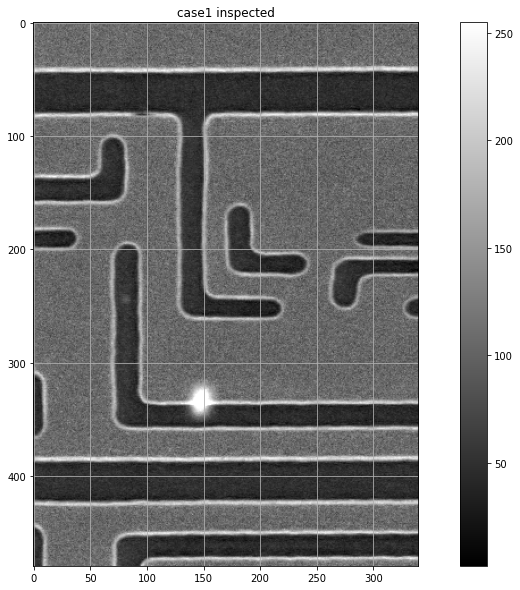

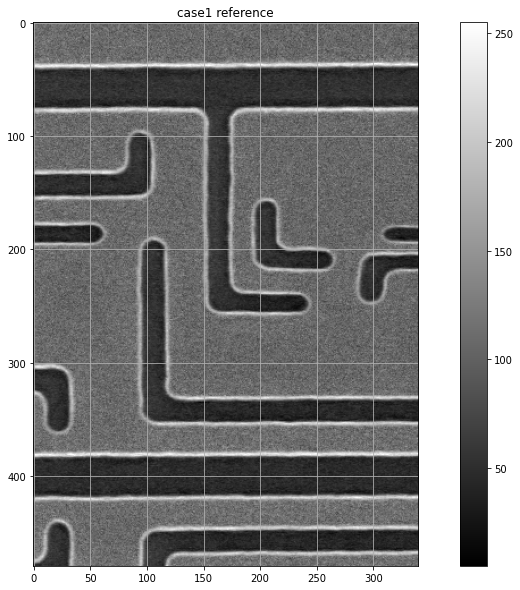

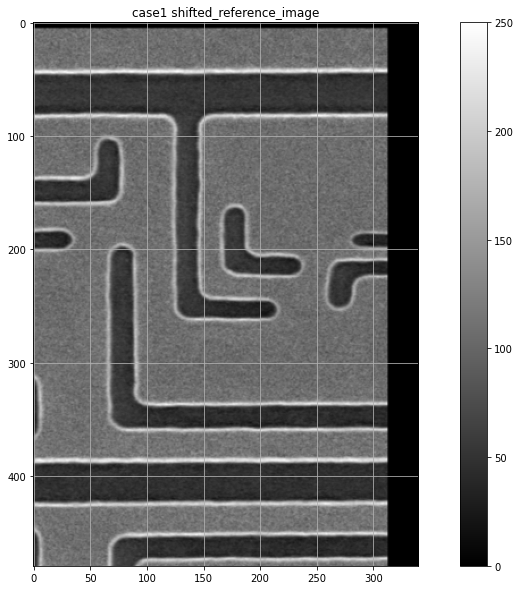

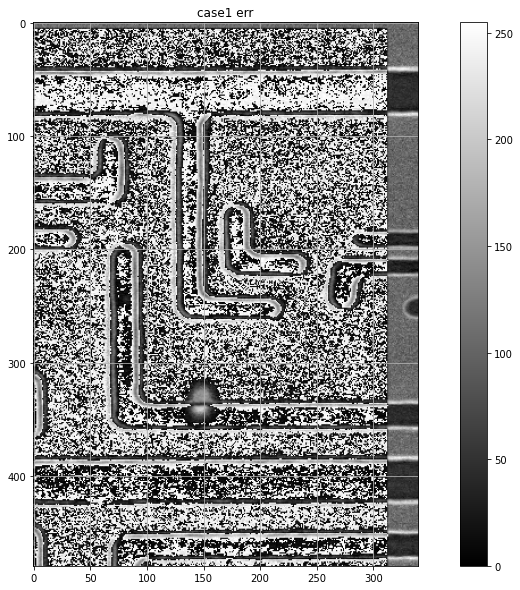

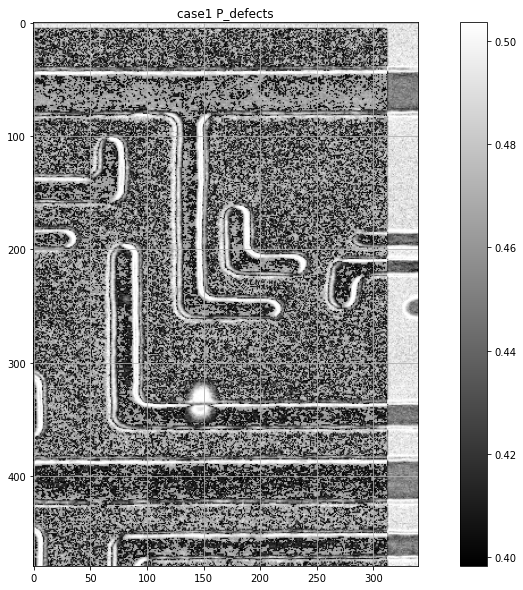

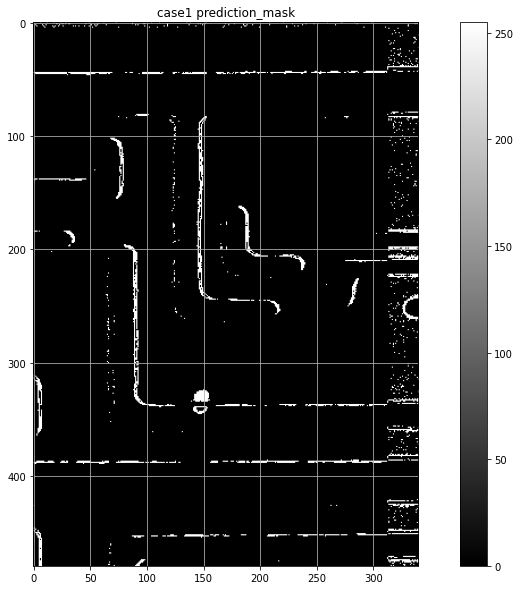

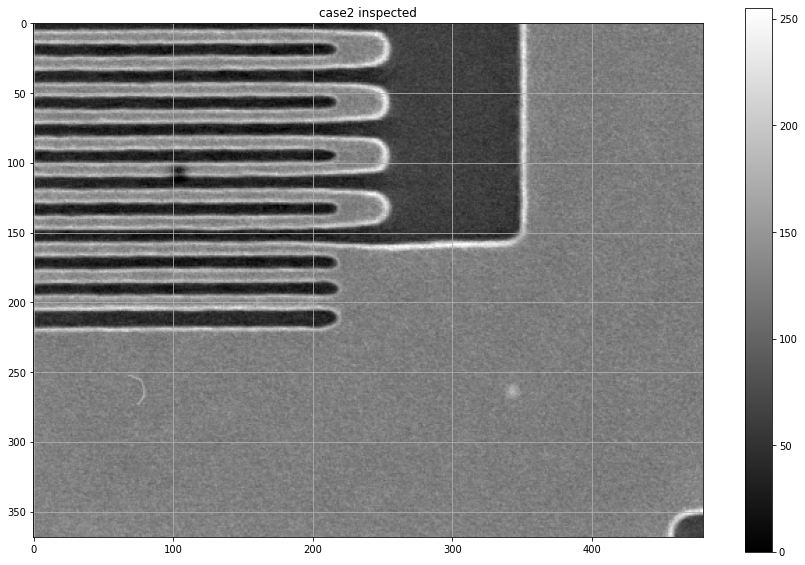

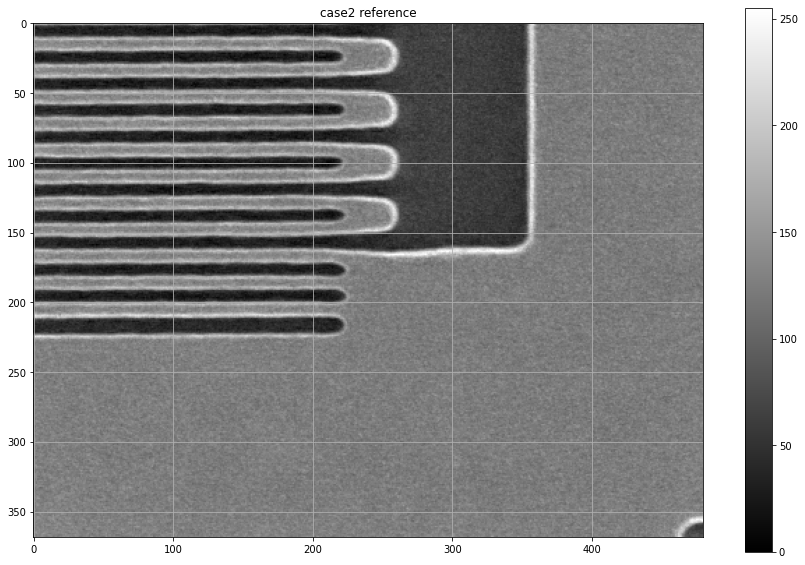

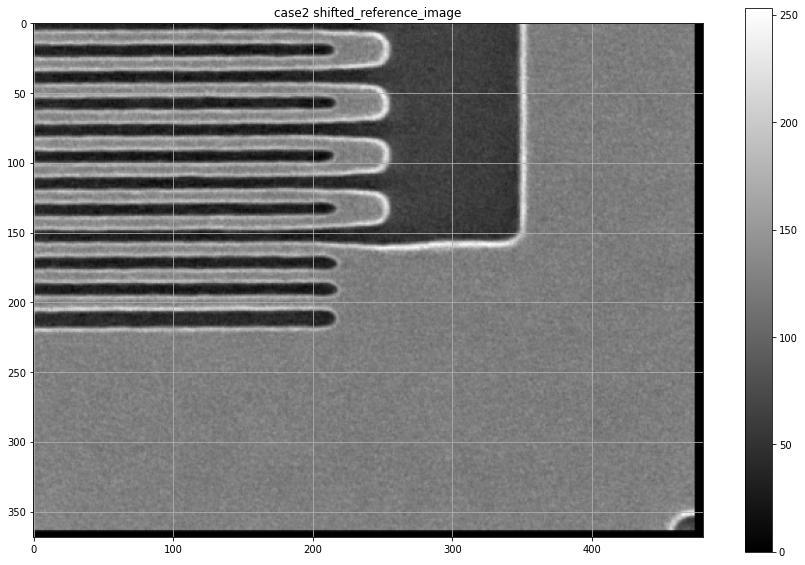

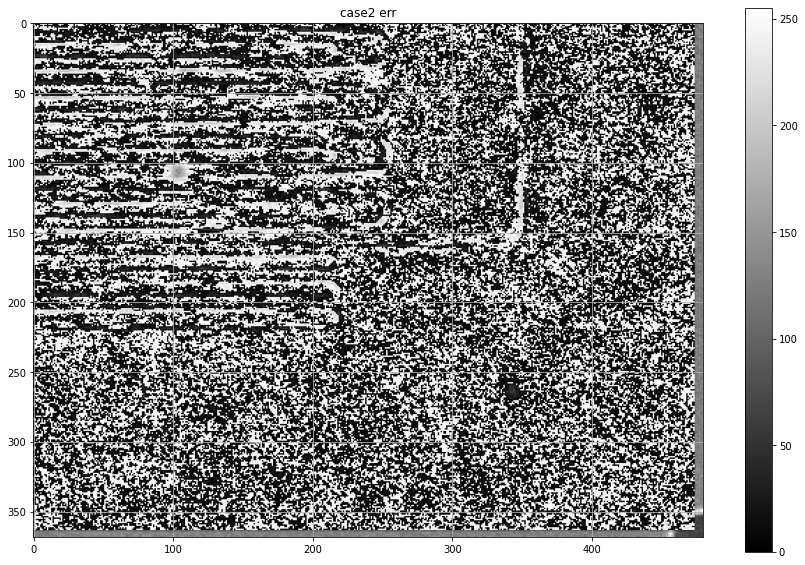

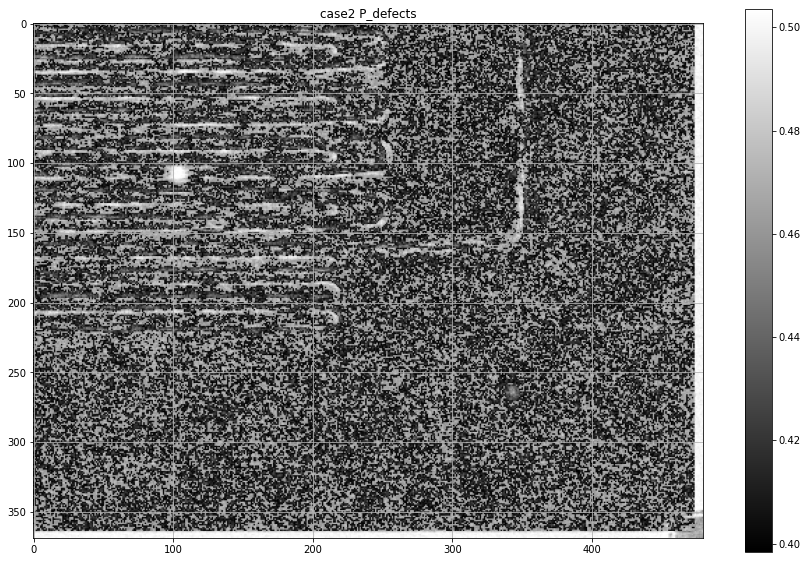

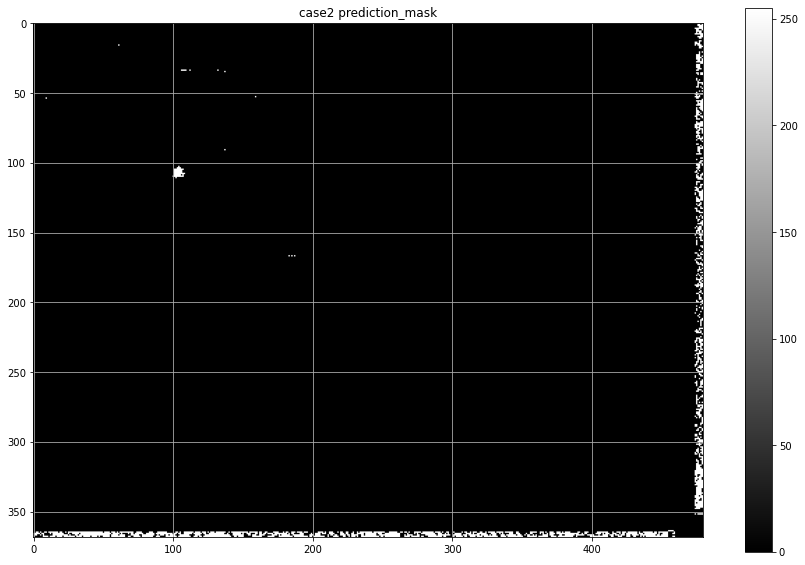

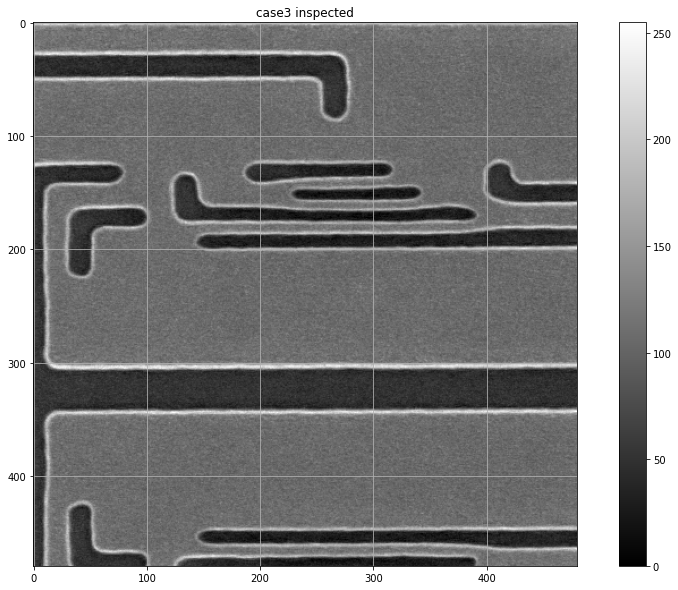

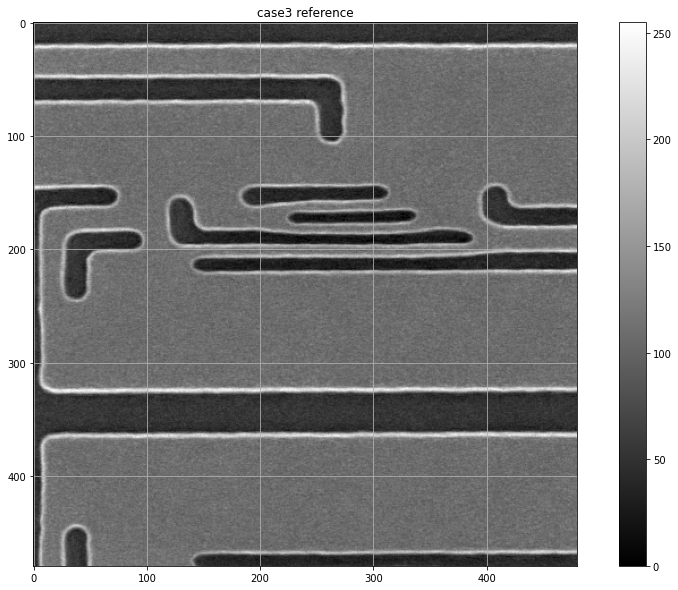

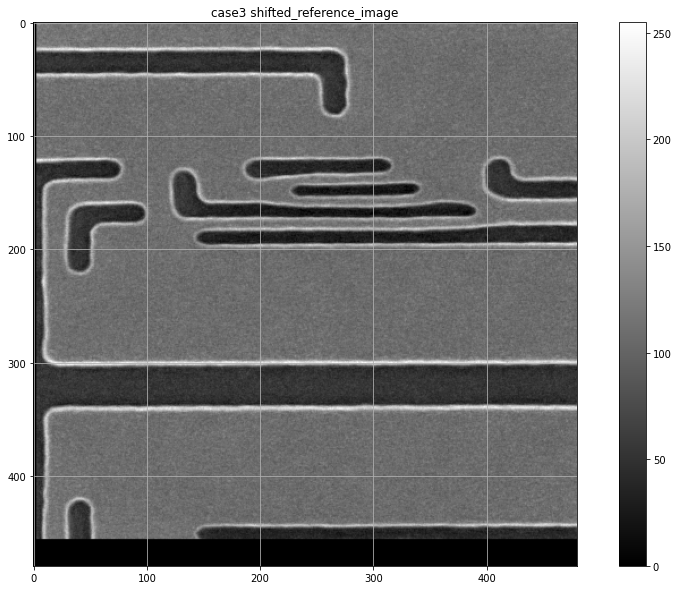

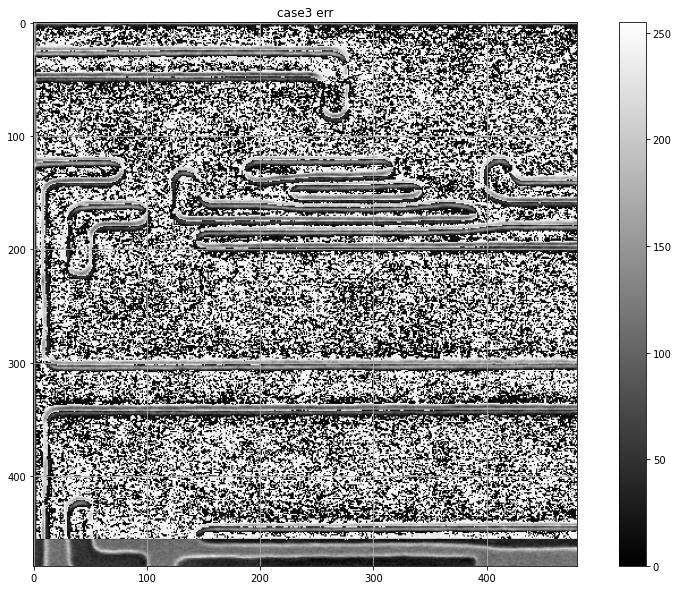

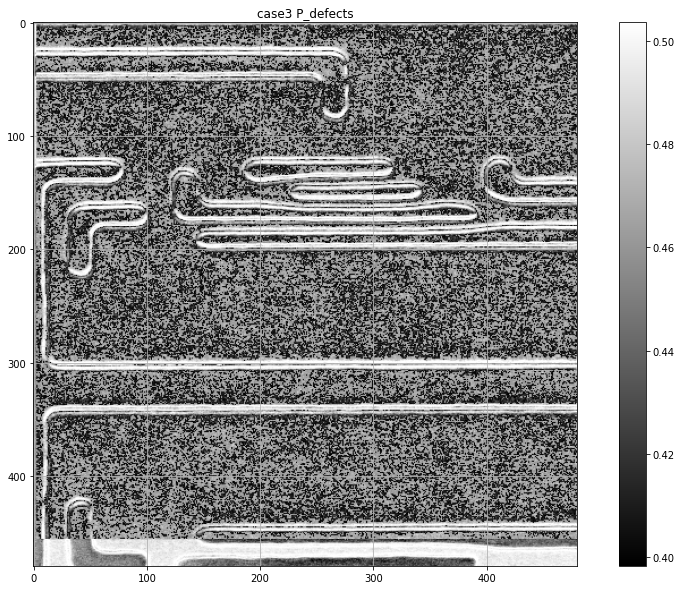

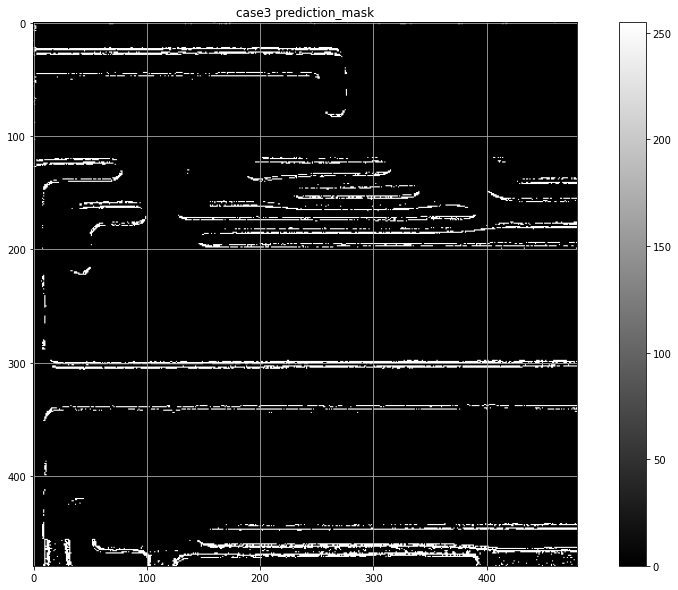

In [10]:
for case in images:
    for img_type in images[case]:
        plt.figure(figsize=(15, 10))
        plt.imshow(images[case][img_type], cmap='gray')
        plt.title(f'{case} {img_type}')
        plt.colorbar()
        plt.grid()
        plt.show()
        print('\n\n')